# AI4
## This is project No.4 and the aim of this project is to learn machine learning methods using the Learn-Scikit library.

### Introduction
This project is defined in four phases. In phase zero, we examine the data set and analyze the exploratory data. In the first phase, we will get familiar with preprocessing. In the second phase, we will implement and optimize models using several classifiers defined in the Learn-Scikit library. Finally, in the third phase, using the optimal models of the second phase, we will implement several group learning methods and analyze the results.

In [667]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from math import sqrt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [668]:
data_set = pd.read_csv('dataset.csv')
data_set

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.1590,-7.429,Major,0.0382,142.065,0.6070,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.1270,-10.147,Major,0.1840,79.969,0.2870,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.2650,-7.080,Minor,0.0378,NaN,0.6360,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.1390,-15.542,Major,0.0346,82.707,0.2060,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.3060,-6.625,Major,0.0630,104.694,0.3830,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620: Wie stark ist nicht d...",22.0,0.91100,0.326,368640.0,0.1330,0.000000,G,0.1300,-20.493,Major,0.0557,92.090,0.2060,Classical
29996,New York Philharmonic,"Symphony No. 2 in D Major, Op. 73: II. Adagio ...",26.0,0.96500,0.126,514213.0,0.2040,0.869000,B,0.1060,-16.474,Major,0.0395,82.437,0.0387,Classical
29997,Georges Bizet,"Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...",54.0,0.97600,0.363,262147.0,0.1150,0.000000,D,0.0992,-17.325,Major,0.0689,NaN,0.2310,Classical
29998,Edvard Grieg,"Peer Gynt-Suite Nr. 1, Op. 46: I. Morning",42.0,0.98500,0.123,259573.0,0.0174,0.906000,E,0.1250,-23.671,Major,0.0408,71.705,0.0352,Classical


# Phase Zero: EDA and Visualization
-------------------------

## Q1: Check the overall structure of the data using `describe` and `info` methods from the pandas library.

The `describe()` method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [669]:
data_set.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


The `info()` method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column. We can see non-null count for each column.

In [670]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

## Q2: Find and display the percentage of data lost in each feature.

In [671]:
def calculate_missing_values_percentage(curr_data_set):
    nan_count = curr_data_set.isna().sum()
    row_count = len(curr_data_set.index)

    return (nan_count/row_count) * 100
calculate_missing_values_percentage(data_set)

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

## Q3: Draw a distribution chart of numeric and non-numeric properties

As we can see from the charts below, some of numerical graphs follow by Gaussian distribution and the others follow by bell distribution.

In [672]:
def show_chart(curr_var, col_name):
    # set the histogram
    plt.hist(curr_var, 
             range=(curr_var.min(),
                    curr_var.max()+1), 
             bins=25, 
             alpha=0.5) 
    # set title and labels
    plt.xlabel(col_name) 
    plt.ylabel("Count") 
    plt.title("Histogram of " + col_name) 
    plt.show()    

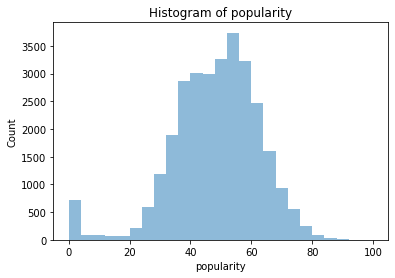

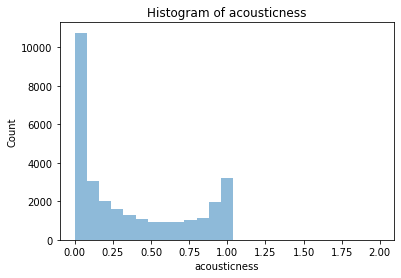

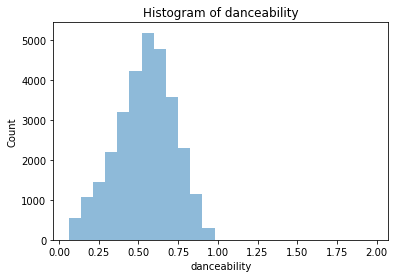

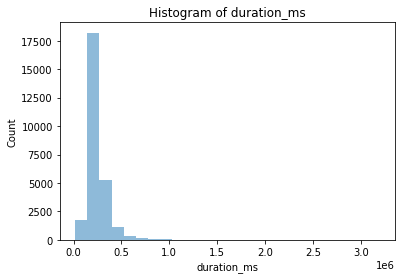

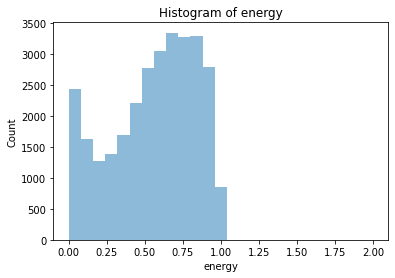

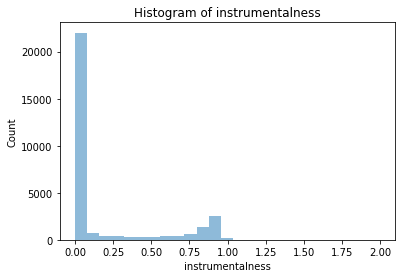

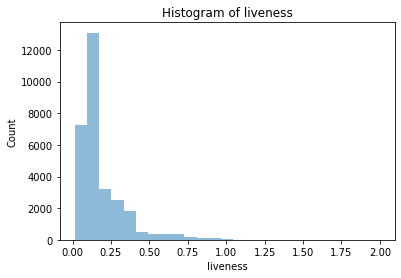

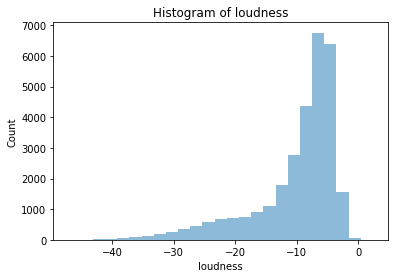

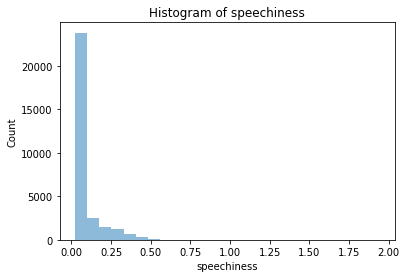

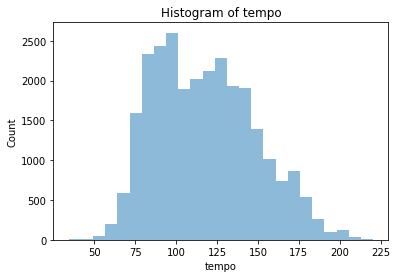

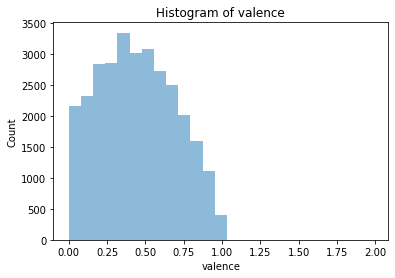

In [673]:
numerical_cols_name = list(data_set.select_dtypes([np.number]).columns)
for col in numerical_cols_name:
    show_chart(data_set[col], col)

In [674]:
def show_bar_chart(index_list, count_list, col_name):
    # set the histogram
    plt.bar(index_list, 
             count_list) 
    # set title and labels
    plt.xlabel(col_name) 
    plt.ylabel("Count") 
    plt.title("Histogram of " + col_name) 
    plt.show()    

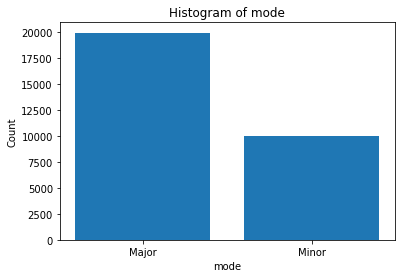

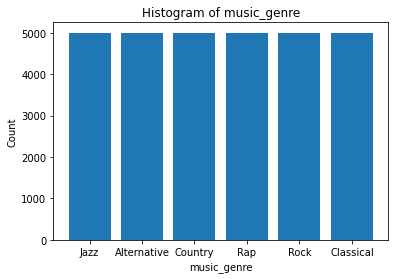

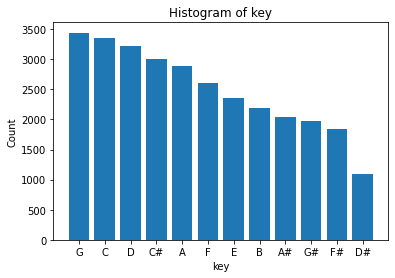

In [675]:
non_numerical_cols_name =["mode", "music_genre", "key"]
for col in non_numerical_cols_name:    
    index_list = data_set[col].value_counts().index.tolist()
    count_list = data_set[col].value_counts().tolist()
    show_bar_chart(index_list, count_list, col)

# Phase One: Preprocessing
-------------------------

## Q1: Describe the available methods for managing missing values and describe the advantages and disadvantages of each method.
1- Eliminate rows with missing data:<br/>
Simple and sometimes effective strategy. Fails if many objects have missing values. If a feature has mostly missing values, then that feature itself can also be eliminated.<br/>
2- Estimate missing values:<br/>
If only a reasonable percentage of values are missing, then we can also run simple interpolation methods to fill in those values. However, most common method of dealing with missing values is by filling them in with the `mean` or `median` of the respective feature.

## Q2: For each column with missing values, select one of the lost data management methods and apply it.

In [676]:
data_set.fillna(data_set.mean(numeric_only=True, axis=0), inplace=True)
data_set['artist_name'] = data_set['artist_name'].fillna(data_set['artist_name'].mode()[0])
calculate_missing_values_percentage(data_set)

artist_name         0.0
track_name          0.0
popularity          0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
valence             0.0
music_genre         0.0
dtype: float64

## Q3: For numerical properties, what is Normalization or Standardization used for?
Normalization or Min-Max Scaling is used to transform features to be on a similar scale. This scales the range to [0, 1] or sometimes [-1, 1].  The new point is calculated as:<br/>
`X_new = (X - X_min)/(X_max - X_min)`<br/>
Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. It is not bounded to a certain range. Standardization can be helpful in cases where the data follows a Gaussian distribution. This is often called as Z-score.<br/>
`X_new = (X - mean)/Std`

## Q4: What method do you use to scale the data in this project? Why?
I use standardization; because standardization is more effective if your attribute distribution is Gaussian. And it changes the mean to 0 and variance to 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

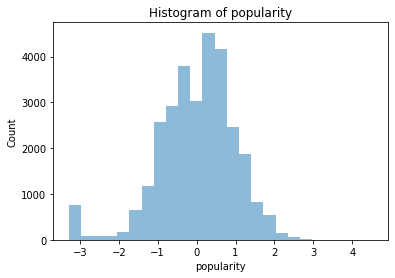

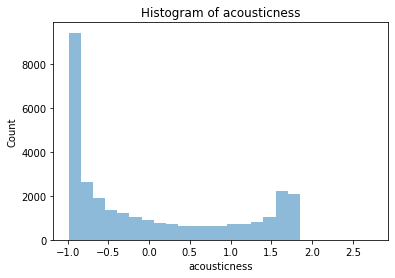

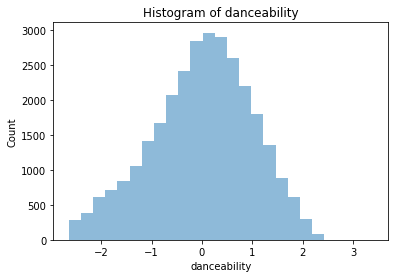

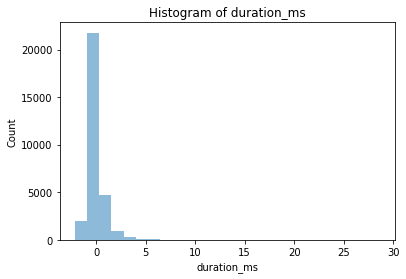

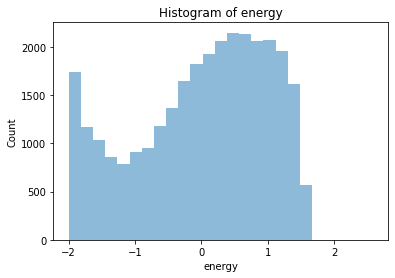

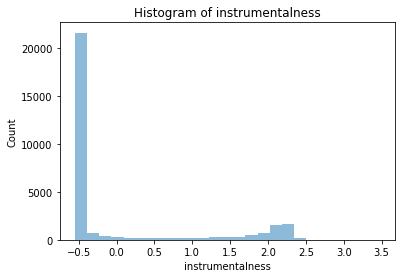

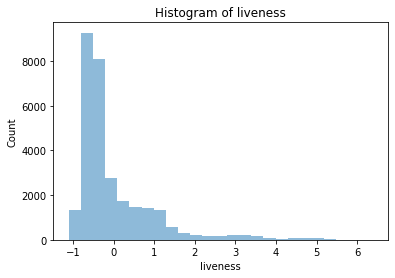

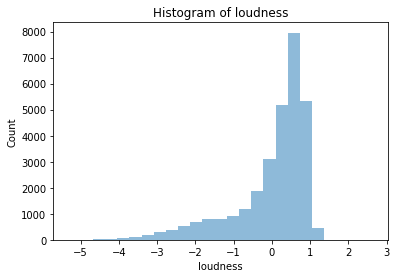

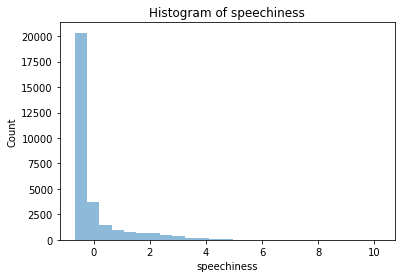

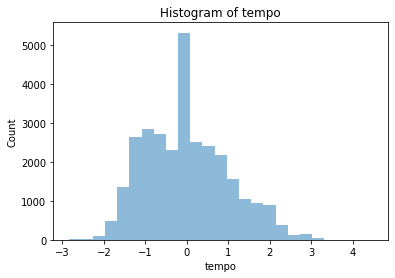

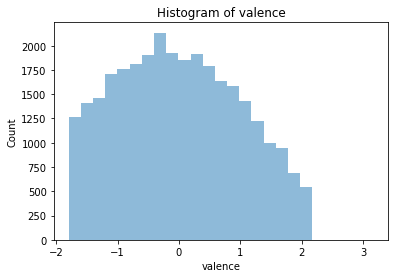

In [677]:
for col in numerical_cols_name:
    data_set[col] = (data_set[col]-data_set[col].mean())/data_set[col].std()
    data_set[col] = (data_set[col]-data_set[col].mean())/data_set[col].std()
    
for col in numerical_cols_name:
    show_chart(data_set[col], col)    

## Q5: There are many ways for our model to work with batch data. Explain the two methods and state which method you used. Why?
There are several different types of categorical data including:<br/>
Binary: A variable that has only 2 values. For example, True/False or Yes/No.<br/>
Ordinal: A variable that has some order associated with it.<br/>
Nominal: A variable that has no numerical importance, for example color or city.<br/>

I select number for data in each column to enable us to work with non numerical data.

In [678]:
# Also we can apply nomical operator on artist_name
# data_set = pd.get_dummies(data_set, columns=["artist_name"])

# I prefer to delete track_name column, because they are unique for each row and it doesn't almost add more information 
data_set.pop("track_name") 

label_encoder = LabelEncoder()
for category in ["mode", "key", "music_genre", "artist_name"]:
    data_set[category] = label_encoder.fit_transform(data_set[category])

data_set

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,531,-0.259741,-0.970532,0.935904,3.683534e-01,0.231381,-0.458783,10,-0.163272,0.381203,0,-0.489052,8.398059e-01,0.644987,3
1,1511,-0.948794,-0.034765,1.034959,-1.338391e+00,-0.150111,-0.527946,3,-0.375567,-0.009655,0,1.072549,-1.288258e+00,-0.641471,3
2,582,0.222596,-0.937884,0.704778,-1.061077e-16,1.181513,2.122853,10,0.539958,0.431391,1,-0.493336,-3.278522e-16,0.761572,3
3,3210,-0.604268,1.533131,-0.313279,-1.677218e-01,-1.754179,-0.548746,8,-0.295956,-0.785474,0,-0.527610,-1.194425e+00,-0.967105,3
4,2874,-0.810984,-0.892852,-0.373812,9.009268e-01,0.958376,0.805165,10,0.811962,0.496821,0,-0.223430,-4.409188e-01,-0.255534,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4924,-1.775658,1.513910,-1.182754,1.142242e+00,-1.524924,-0.548956,10,-0.355665,-1.497445,0,-0.301617,-8.728649e-01,-0.967105,1
29996,3176,-1.500037,1.662188,-2.283356,2.505257e+00,-1.269396,2.089455,2,-0.514887,-0.919499,0,-0.475128,-1.203678e+00,-1.639681,1
29997,1662,0.429312,1.692392,-0.979143,1.451370e-01,-1.589705,-0.548956,5,-0.559999,-1.041876,0,-0.160237,-3.278522e-16,-0.866601,1
29998,1330,-0.397552,1.717105,-2.299865,1.210364e-01,-1.940966,2.201793,7,-0.388836,-1.954453,0,-0.461204,-1.571470e+00,-1.653752,1


## Q6: Given that the singer's name seems to be a useful feature in distinguishing the music genre. Can it be modified to be usable? If not, is there any way but to delete this column?

As we see in previous part, we can make this column to numerical by passing a number to each distinct `artist_name` value. we can do this by `fit_transform`. We have written this code in previous part.

## Q7: Calculate gain information for attributes

In [679]:
# pop music_genre for target column
y = data_set.pop("music_genre")

<AxesSubplot:>

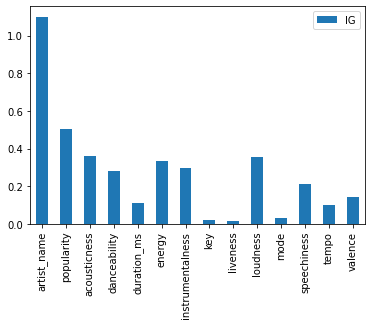

In [680]:
X_train, X_test, y_train, y_test = train_test_split(data_set, y, test_size = 0.33, random_state = 1)
IG = mutual_info_classif(X_train, y_train)

pd.DataFrame(IG, columns=["IG"], index=X_train.columns).plot(kind='bar')

## Q8: Do you think all the columns give us useful information to understand the music genre? What are the advantages and disadvantages of keeping all the features? Can we delete a column from the dataset? What are the advantages and disadvantages of deleting one or more columns? Which features do you think can be useful in predicting the genre of a piece of music? Which columns can we remove?
According to part 7, Some columns like `artist name`, `popularity`, `loudness`, `acousticness`, `energy`, `instrumentalness` and `danceability` have more information gain and they can help us to recognize `music_gene` better than the others. We can delete features with low IG for decision tree algorithm. Keeping all features and use them may take more time and it likely doen't affect on result but it may make it more accracy and make a few changes in data set. With delete some columns, in large data sets, we may have better result. Also numerical columns can be more useful and it prefer to keep them instead of non-numerical columns. For example, we delete `track_name` column; because we can not use them in the following processing and all of them are unique, so we have 3000 distinct values here for track_name. I dropped it in previous part.

In [681]:
data_set = data_set.drop(['liveness'], axis = 1)
data_set

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,loudness,mode,speechiness,tempo,valence
0,531,-0.259741,-0.970532,0.935904,3.683534e-01,0.231381,-0.458783,10,0.381203,0,-0.489052,8.398059e-01,0.644987
1,1511,-0.948794,-0.034765,1.034959,-1.338391e+00,-0.150111,-0.527946,3,-0.009655,0,1.072549,-1.288258e+00,-0.641471
2,582,0.222596,-0.937884,0.704778,-1.061077e-16,1.181513,2.122853,10,0.431391,1,-0.493336,-3.278522e-16,0.761572
3,3210,-0.604268,1.533131,-0.313279,-1.677218e-01,-1.754179,-0.548746,8,-0.785474,0,-0.527610,-1.194425e+00,-0.967105
4,2874,-0.810984,-0.892852,-0.373812,9.009268e-01,0.958376,0.805165,10,0.496821,0,-0.223430,-4.409188e-01,-0.255534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,4924,-1.775658,1.513910,-1.182754,1.142242e+00,-1.524924,-0.548956,10,-1.497445,0,-0.301617,-8.728649e-01,-0.967105
29996,3176,-1.500037,1.662188,-2.283356,2.505257e+00,-1.269396,2.089455,2,-0.919499,0,-0.475128,-1.203678e+00,-1.639681
29997,1662,0.429312,1.692392,-0.979143,1.451370e-01,-1.589705,-0.548956,5,-1.041876,0,-0.160237,-3.278522e-16,-0.866601
29998,1330,-0.397552,1.717105,-2.299865,1.210364e-01,-1.940966,2.201793,7,-1.954453,0,-0.461204,-1.571470e+00,-1.653752


# Phase Two: Model Training, Evaluation and Hyper Parameter Tuning
-------------------------

## Q1: The first step is to divide the data into two categories: train and test. One method is to consider the first P percent of the data for the train and the rest for the test. What number do you choose for P? Do I need to split the data randomly? Why? Is it necessary for the ratio of the number of data related to each music genre to the total data in the training and testing data to be equal?
The simplest way to split the modelling dataset into training and testing sets is to assign 2/3 data points to the former and the remaining one-third to the latter. Therefore, we train the model using the training set and then apply the model to the test set. In this way, we can evaluate the performance of our model. For instance, if the training accuracy is extremely high while the testing accuracy is poor then this is a good indicator that the model is probably overfitted.<br/>
common split percentages include:<br/>
Train: 80%, Test: 20%<br/>
Train: 67%, Test: 33%<br/>
Train: 50%, Test: 50%<br/>
with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance.<br/>

Another important consideration is that rows are assigned to the train and test sets randomly.
This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset, which in turn, should be a representative sample of observations from the problem domain.
When comparing machine learning algorithms, it is desirable (perhaps required) that they are fit and evaluated on the same subsets of the dataset.
This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset.<br/>

Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
This is called a stratified train-test split.
We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.<br/>

So we use stratify to have every `music_genre` in both train and test set but it doesn't need to make them equal. They can be near to each other.

## Q2: Divide the data into two categories: train and test

In [682]:
X_train, X_test, y_train, y_test = train_test_split(data_set, y, test_size=0.33, random_state=1, stratify=y)
len(X_train), len(X_test), len(y_train), len(y_test)

(20100, 9900, 20100, 9900)

## Q3: For the KNN model, draw a model accuracy chart (for test and train data) based on the number of neighbors hyper parameter and check and analyze the overfitting on this chart.

Text(0, 0.5, 'Accuracy')

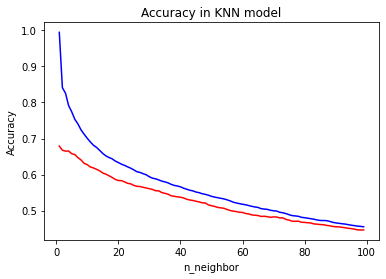

In [683]:
# KNN based on n_neighbors
true_pred_count_test = []
true_pred_count_train = []
range_n_neighbor = range(1, 100)

for n in range_n_neighbor:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    
    y_pred_test_knn = knn.predict(X_test)
    true_pred_count_test.append(np.sum(y_pred_test_knn == y_test)/len(X_test))
    
    y_pred_train_knn = knn.predict(X_train)
    true_pred_count_train.append(np.sum(y_pred_train_knn == y_train)/len(X_train))

plt.plot(range_n_neighbor, true_pred_count_test, color='red', markersize=10, label='test')
plt.plot(range_n_neighbor, true_pred_count_train, color='blue', markersize=10, label='train')

plt.title('Accuracy in KNN model')
plt.xlabel('n_neighbor')
plt.ylabel('Accuracy')

## Q4: Tree Decision Model Set the parameters `depth_max` and `leaf_samples_min`. Then, like the previous question, draw the accuracy chart in terms of hyper-parameters.
<b>min_samples_leaf</b>(int or float, default=1):The minimum number of samples required to be at a leaf node.<br/>
<b>max_depth</b>(int, default=None):The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br/>

`min_samples_leaf` doesn't affect seriously on the accuracy for a specialized max_depth according to the chart below but `max_depth` is so important for that.

Text(0, 0.5, 'Accuracy')

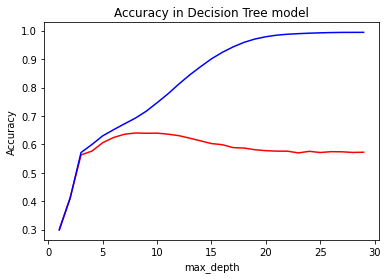

In [684]:
# Decision Tree chart based on max_depth
true_pred_count_test = []
true_pred_count_train = []
range_max_depth = range(1, 30)

for n in range_max_depth:
    decision_tree = DecisionTreeClassifier(max_depth = n)
    decision_tree.fit(X_train, y_train)
    
    y_pred_test_DT = decision_tree.predict(X_test)
    true_pred_count_test.append(np.sum(y_pred_test_DT == y_test)/len(X_test))
    
    y_pred_train_DT = decision_tree.predict(X_train)
    true_pred_count_train.append(np.sum(y_pred_train_DT == y_train)/len(X_train))
    

plt.plot(range_max_depth, true_pred_count_test, color='red', markersize=10, label='test')
plt.plot(range_max_depth, true_pred_count_train, color='blue', markersize=10, label='train')

plt.title('Accuracy in Decision Tree model')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

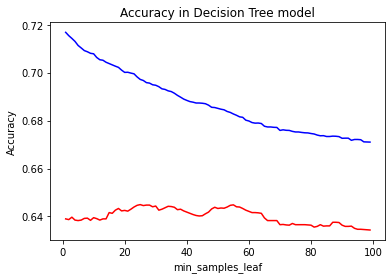

In [685]:
# Decision Tree chart based on min_samples_leaf
true_pred_count_test = []
true_pred_count_train = []
range_min_samples_leaf = range(1, 100)

for n in range_min_samples_leaf:
    decision_tree = DecisionTreeClassifier(max_depth = 9, min_samples_leaf=n)
    decision_tree.fit(X_train, y_train)
    
    y_pred_test_DT = decision_tree.predict(X_test)
    true_pred_count_test.append(np.sum(y_pred_test_DT == y_test)/len(X_test))
    
    y_pred_train_DT = decision_tree.predict(X_train)
    true_pred_count_train.append(np.sum(y_pred_train_DT == y_train)/len(X_train))
    

plt.plot(range_min_samples_leaf, true_pred_count_test, color='red', markersize=10, label='test')
plt.plot(range_min_samples_leaf, true_pred_count_train, color='blue', markersize=10, label='train')

plt.title('Accuracy in Decision Tree model')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')

## Q5: Investigate underfitting and overfitting and see if your models have underfitting or overfitting.
terms like overfitting and underfitting refer to deficiencies that the model’s performance might suffer from. This means that knowing “how off” the model’s predictions are is a matter of knowing how close it is to overfitting or underfitting.<br/>

<b>Overfitting</b><br/>
When we run our training algorithm on the data set, we allow the overall cost (i.e. distance from each point to the line) to become smaller with more iterations. Leaving this training algorithm run for long leads to minimal overall cost. However, this means that the line will be fit into all the points (including noise), catching secondary patterns that may not be needed for the generalizability of the model. Overfitting is the case where the overall cost is really small, but the generalization of the model is unreliable. This is due to the model learning “too much” from the training data set.<br/>

<b>Underfitting</b><br/>
We want the model to learn from the training data, but we don’t want it to learn too much (i.e. too many patterns). One solution could be to stop the training earlier. However, this could lead the model to not learn enough patterns from the training data, and possibly not even capture the dominant trend. This case is called underfitting. Underfitting is the case where the model has “ not learned enough” from the training data, resulting in low generalization and unreliable predictions.<br/>

<b>Decision Tree</b>:<br/>
Shallow decision trees (e.g. few levels) generally do not overfit but have poor performance (high bias, low variance). Whereas deep trees (e.g. many levels) generally do overfit and have good performance (low bias, high variance). A desirable tree is one that is not so shallow that it has low skill and not so deep that it overfits the training dataset. The expectation is that as the depth of the tree increases, performance on train and test will improve to a point, and as the tree gets too deep, it will begin to overfit the training dataset at the expense of worse performance on the holdout test set. The plot clearly shows that increasing the tree depth in the early stages results in a corresponding improvement in both train and test sets.

<b>KNN</b>:<br/>
For KNN, as we see in the chart, little max_depth can make underfitting and in large max_depth, the accuracy decreases and it make overfitting too. So a middle max_depth might be useful for this model.

## Q6: Explain the Recall, Precision, Accuracy and Score F1 criteria and measure the accuracy of each model based on these criteria for test and train data.
`precision` equals to what proportion of predicted Positives is truly Positive<br/>
`recall` equals to what proportion of actual Positives is correctly classified<br/>
`f1`, which is actually a balanced combination of accuracy and precision criteria, can be used in cases where the cost of FP and FN is different.<br/>
`accuracy` is how close or far off a given set of measurements (observations or readings) are to their true value,

In [686]:
# For Decision Tree

curr_test_decision_tree = DecisionTreeClassifier(max_depth = 9, min_samples_leaf=60)
curr_test_decision_tree.fit(X_train, y_train)
curr_y_pred_test_DT = curr_test_decision_tree.predict(X_test)
curr_true_pred_count_test = np.sum(curr_y_pred_test_DT == y_test)/len(X_test)

curr_train_decision_tree = DecisionTreeClassifier(max_depth = 9, min_samples_leaf=1)
curr_train_decision_tree.fit(X_train, y_train)
curr_y_pred_train_DT = curr_train_decision_tree.predict(X_train)
curr_true_pred_count_train = np.sum(curr_y_pred_train_DT == y_train)/len(X_train)

print('recall for train set in Decision Tree =    ' + str(recall_score(y_train, curr_y_pred_train_DT, average='weighted')))
print('recall for test set in Decision Tree =     ' + str(recall_score(y_test, curr_y_pred_test_DT, average='weighted')))
print()

print('f1 for train set in Decision Tree =        ' + str(f1_score(y_train, curr_y_pred_train_DT, average='weighted')))
print('f1 for test set in Decision Tree =         ' + str(f1_score(y_test, curr_y_pred_test_DT, average='weighted')))
print()

print('precision for train set in Decision Tree = ' + str(precision_score(y_train, curr_y_pred_train_DT, average='weighted')))
print('precision for test set in Decision Tree =  ' + str(precision_score(y_test, curr_y_pred_test_DT, average='weighted')))
print()

print('accuracy for train set in Decision Tree =  ' + str(accuracy_score(y_train, curr_y_pred_train_DT)))
print('accuracy for test set in Decision Tree =   ' + str(accuracy_score(y_test, curr_y_pred_test_DT)))

recall for train set in Decision Tree =    0.716865671641791
recall for test set in Decision Tree =     0.6421212121212121

f1 for train set in Decision Tree =        0.7153191915790633
f1 for test set in Decision Tree =         0.6370598916242344

precision for train set in Decision Tree = 0.7216832427918525
precision for test set in Decision Tree =  0.6410389067026115

accuracy for train set in Decision Tree =  0.716865671641791
accuracy for test set in Decision Tree =   0.6421212121212121


In [687]:
# For KNN

curr_test_knn = KNeighborsClassifier(n_neighbors = 15)
curr_test_knn.fit(X_train, y_train)
curr_y_pred_test_knn = curr_test_knn.predict(X_test)
curr_true_pred_count_test = np.sum(curr_y_pred_test_knn == y_test)/len(X_test)

curr_train_knn = KNeighborsClassifier(n_neighbors = 15)
curr_train_knn.fit(X_train, y_train)
curr_y_pred_train_knn = curr_train_knn.predict(X_train)
curr_true_pred_count_train = np.sum(curr_y_pred_train_knn == y_train)/len(X_train)

print('recall for train set in KNN =    ' + str(recall_score(y_train, curr_y_pred_train_knn, average='weighted')))
print('recall for test set in KNN =     ' + str(recall_score(y_test, curr_y_pred_test_knn, average='weighted')))
print()

print('f1 for train set in KNN =        ' + str(f1_score(y_train, curr_y_pred_train_knn, average='weighted')))
print('f1 for test set in KNN =         ' + str(f1_score(y_test, curr_y_pred_test_knn, average='weighted')))
print()

print('precision for train set in KNN = ' + str(precision_score(y_train, curr_y_pred_train_knn, average='weighted')))
print('precision for test set in KNN =  ' + str(precision_score(y_test, curr_y_pred_test_knn, average='weighted')))
print()

print('accuracy for train set in KNN =  ' + str(accuracy_score(y_train, curr_y_pred_train_knn)))
print('accuracy for test set in KNN =   ' + str(accuracy_score(y_test, curr_y_pred_test_knn)))

recall for train set in KNN =    0.6586567164179105
recall for test set in KNN =     0.6044444444444445

f1 for train set in KNN =        0.6561259972161977
f1 for test set in KNN =         0.6009769967550543

precision for train set in KNN = 0.6620536065388898
precision for test set in KNN =  0.6063630464068807

accuracy for train set in KNN =  0.6586567164179105
accuracy for test set in KNN =   0.6044444444444445


## Q7: Examine the impact of the preprocessing you did on the data thoroughly.
I calculated precision, accuracy, recall and f1 with all columns and they were around 50% but with dropping some columns and keeping columns with larger IG, it's being around 60%. Also we have a good criterion named IG that help us to pick better columns for our processing. Some operators like replacing NANs with mean and mode doesn't have negative effect on data and it helps to use all columns with goof IG instead of dropping them. Preprocessing helps us to normalize data on a specified range of x to enable us to compare them with each other. also we can affect on overfitting and underfitting by preprocessing.

# Phase Three: Ensemble Methods
-------------------------

## Q1: Implement `Random Forest` with the help of the Learn-Scikit library.
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.<br/>

Text(0, 0.5, 'Accuracy')

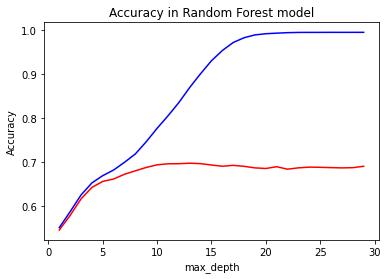

In [688]:
# Random Forest chart based on max_depth
true_pred_count_test = []
true_pred_count_train = []
range_max_depth = range(1, 30)

for n in range_max_depth:
    random_forest = RandomForestClassifier(max_depth = n)
    random_forest.fit(X_train, y_train)
    
    y_pred_test_rf = random_forest.predict(X_test)
    true_pred_count_test.append(np.sum(y_pred_test_rf == y_test)/len(X_test))
    
    y_pred_train_rf = random_forest.predict(X_train)
    true_pred_count_train.append(np.sum(y_pred_train_rf == y_train)/len(X_train))
    

plt.plot(range_max_depth, true_pred_count_test, color='red', markersize=10, label='test')
plt.plot(range_max_depth, true_pred_count_train, color='blue', markersize=10, label='train')

plt.title('Accuracy in Random Forest model')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

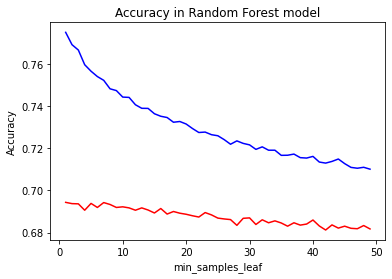

In [689]:
# Random Forest chart based on min_samples_leaf
true_pred_count_test = []
true_pred_count_train = []
range_min_samples_leaf = range(1, 50)

for n in range_min_samples_leaf:
    random_forest = RandomForestClassifier(max_depth = 10, min_samples_leaf=n)
    random_forest.fit(X_train, y_train)
    
    y_pred_test_rf = random_forest.predict(X_test)
    true_pred_count_test.append(np.sum(y_pred_test_rf == y_test)/len(X_test))
    
    y_pred_train_rf = random_forest.predict(X_train)
    true_pred_count_train.append(np.sum(y_pred_train_rf == y_train)/len(X_train))
    

plt.plot(range_min_samples_leaf, true_pred_count_test, color='red', markersize=10, label='test')
plt.plot(range_min_samples_leaf, true_pred_count_train, color='blue', markersize=10, label='train')

plt.title('Accuracy in Random Forest model')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

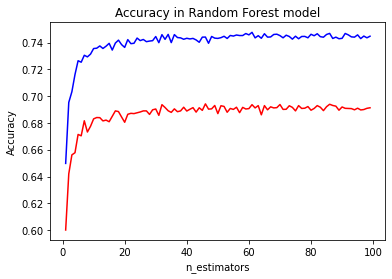

In [690]:
# Random Forest chart based on min_samples_leaf
true_pred_count_test = []
true_pred_count_train = []
range_n_estimators = range(1, 100)

for n in range_n_estimators:
    random_forest = RandomForestClassifier(n_estimators=n, max_depth = 10, min_samples_leaf=10)
    random_forest.fit(X_train, y_train)
    
    y_pred_test_rf = random_forest.predict(X_test)
    true_pred_count_test.append(np.sum(y_pred_test_rf == y_test)/len(X_test))
    
    y_pred_train_rf = random_forest.predict(X_train)
    true_pred_count_train.append(np.sum(y_pred_train_rf == y_train)/len(X_train))
    

plt.plot(range_n_estimators, true_pred_count_test, color='red', markersize=10, label='test')
plt.plot(range_n_estimators, true_pred_count_train, color='blue', markersize=10, label='train')

plt.title('Accuracy in Random Forest model')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

## Q2: Examine the effect of depth max hyper parameters, estimators n and leaf_samples_min on this model and explain them.
<b>min_samples_leaf</b>(int or float, default=1): The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.<br/>
<b>max_depth</b>(int, default=None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br/>
<b>n_estimators</b>(int, default=100): The number of trees in the forest.<br/>

According to the charts above, `n_estimators` and `max_depth` have more effect than `min_samples_leaf`

## Q3: Measure the accuracy of your model using the Recall, Precision, Accuracy and Score F1 criteria.

In [691]:
# For Random Forest

rf = RandomForestClassifier(n_estimators=25, max_depth = 10, min_samples_leaf=1)
rf.fit(X_train, y_train)

y_pred_test_rf = rf.predict(X_test)
true_pred_count_test.append(np.sum(y_pred_test_rf == y_test)/len(X_test))

y_pred_train_rf = rf.predict(X_train)
true_pred_count_train.append(np.sum(y_pred_train_rf == y_train)/len(X_train))
    
print('recall for train set in Random Forest =    ' + str(recall_score(y_train, y_pred_train_rf, average='weighted')))
print('recall for test set in Random Forest =     ' + str(recall_score(y_test, y_pred_test_rf, average='weighted')))
print()

print('f1 for train set in Random Forest =        ' + str(f1_score(y_train, y_pred_train_rf, average='weighted')))
print('f1 for test set in Random Forest =         ' + str(f1_score(y_test, y_pred_test_rf, average='weighted')))
print()

print('precision for train set in Random Forest = ' + str(precision_score(y_train, y_pred_train_rf, average='weighted')))
print('precision for test set in Random Forest =  ' + str(precision_score(y_test, y_pred_test_rf, average='weighted')))
print()

print('accuracy for train set in Random Forest =  ' + str(accuracy_score(y_train, y_pred_train_rf)))
print('accuracy for test set in Random Forest =   ' + str(accuracy_score(y_test, y_pred_test_rf)))    

recall for train set in Random Forest =    0.7713432835820896
recall for test set in Random Forest =     0.6918181818181818

f1 for train set in Random Forest =        0.769320601618762
f1 for test set in Random Forest =         0.6861591495142362

precision for train set in Random Forest = 0.7864634286898223
precision for test set in Random Forest =  0.6993359065674396

accuracy for train set in Random Forest =  0.7713432835820896
accuracy for test set in Random Forest =   0.6918181818181818


## Q4: After finding the optimal hyperparameters, show your model Matrix Confusion.
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class 

In [692]:
confusion_matrix(y_train, rf.predict(X_train))

array([[1671,    2,  400,  210,  317,  750],
       [ 101, 3069,   29,  134,    1,   16],
       [ 167,    0, 2227,  165,   82,  709],
       [  82,   76,  182, 2825,   62,  123],
       [  69,    0,   19,   13, 2813,  436],
       [ 112,    1,   95,   35,  208, 2899]], dtype=int64)

In [693]:
confusion_matrix(y_test, rf.predict(X_test))

array([[ 596,    4,  231,  158,  217,  444],
       [  43, 1452,   19,  129,    0,    7],
       [ 117,    1, 1003,  109,   56,  364],
       [  87,  129,  116, 1196,   38,   84],
       [  55,    0,   10,   18, 1310,  257],
       [ 110,    3,   66,   48,  131, 1292]], dtype=int64)